In [1]:
# Add anna to the path
import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

DATA_DIR = "../../../data"

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import anna.dataset.reuters21578.parser as data
import anna.model as model

%matplotlib inline

In [3]:
# Load data
train_docs, test_docs, unused_docs = data.fetch_and_parse(DATA_DIR)

In [4]:
# Preprocess labels
labels = []
for d in train_docs + test_docs:
    for l in d.labels:
        if l not in labels:
            labels.append(l)

In [5]:
# Create MLP classifier
model = model.EncRNN(DATA_DIR, labels)

Building model
Compiling model


In [6]:
# Train
history = model.train(train_docs, test_docs)

Train on 6993 samples, validate on 777 samples
Epoch 1/50
6976/6993 [============================>.]6976/6993 [============================>.] - ETA: 0s - loss: 4.4444
val - acc: 0.4865, hamming: 0.9910, ebf1: 0.5199, mif1: 0.5792, maf1: 0.3342

test - acc: 0.5588, hamming: 0.9918, ebf1: 0.5823, mif1: 0.6215, maf1: 0.0414
6993/6993 [==============================]6993/6993 [==============================] - 380s 54ms/step - loss: 4.4401 - val_loss: 3.0792

Epoch 2/50
6976/6993 [============================>.]6976/6993 [============================>.] - ETA: 0s - loss: 2.2734
val - acc: 0.5920, hamming: 0.9926, ebf1: 0.6560, mif1: 0.6894, maf1: 0.3819

test - acc: 0.6737, hamming: 0.9938, ebf1: 0.7183, mif1: 0.7354, maf1: 0.0949
6993/6993 [==============================]6993/6993 [==============================] - 371s 53ms/step - loss: 2.2732 - val_loss: 2.5238

Epoch 3/50
6976/6993 [============================>.]6976/6993 [============================>.] - ETA: 0s - loss: 1.7162
val 


Epoch 21/50
6976/6993 [============================>.]6976/6993 [============================>.] - ETA: 0s - loss: 0.3398
val - acc: 0.7516, hamming: 0.9947, ebf1: 0.8434, mif1: 0.8106, maf1: 0.6108

test - acc: 0.7797, hamming: 0.9953, ebf1: 0.8575, mif1: 0.8236, maf1: 0.4124
6993/6993 [==============================]6993/6993 [==============================] - 352s 50ms/step - loss: 0.3397 - val_loss: 2.5204

Epoch 22/50
6976/6993 [============================>.]6976/6993 [============================>.] - ETA: 0s - loss: 0.3276
val - acc: 0.7336, hamming: 0.9937, ebf1: 0.8373, mif1: 0.7890, maf1: 0.5739

test - acc: 0.7681, hamming: 0.9948, ebf1: 0.8601, mif1: 0.8143, maf1: 0.4115
6993/6993 [==============================]6993/6993 [==============================] - 352s 50ms/step - loss: 0.3283 - val_loss: 2.5604

Epoch 23/50
6976/6993 [============================>.]6976/6993 [============================>.] - ETA: 0s - loss: 0.3165
val - acc: 0.7632, hamming: 0.9947, ebf1: 0.845


Epoch 41/50
6976/6993 [============================>.]6976/6993 [============================>.] - ETA: 0s - loss: 0.3288
val - acc: 0.7387, hamming: 0.9940, ebf1: 0.8432, mif1: 0.7943, maf1: 0.5618

test - acc: 0.7738, hamming: 0.9949, ebf1: 0.8626, mif1: 0.8172, maf1: 0.4434
6993/6993 [==============================]6993/6993 [==============================] - 353s 50ms/step - loss: 0.3292 - val_loss: 3.3610

Epoch 42/50
6976/6993 [============================>.]6976/6993 [============================>.] - ETA: 0s - loss: 0.2513
val - acc: 0.7555, hamming: 0.9945, ebf1: 0.8489, mif1: 0.8070, maf1: 0.5840

test - acc: 0.7738, hamming: 0.9951, ebf1: 0.8546, mif1: 0.8202, maf1: 0.4532
6993/6993 [==============================]6993/6993 [==============================] - 352s 50ms/step - loss: 0.2512 - val_loss: 3.4144

Epoch 43/50
6976/6993 [============================>.]6976/6993 [============================>.] - ETA: 0s - loss: 0.3172
val - acc: 0.7439, hamming: 0.9943, ebf1: 0.840

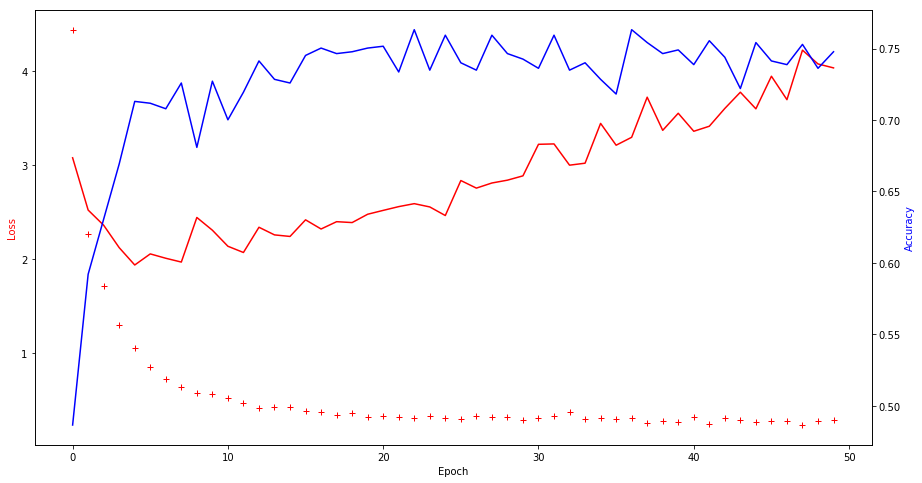

In [7]:
pre, ax = plt.subplots(figsize=[15, 8])

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss", color="r")
ax.plot(range(50), history.history["val_loss"], "r-")
ax.plot(range(50), history.history["loss"], "r+")

ax2 = ax.twinx()
ax2.set_ylabel("Accuracy", color="b")
ax2.plot(range(50), history.history["val_acc"], "b-")